## Block 2 Home Work


## Huram-ABi Nzia Yotchoum

## Documentations

        https://www.geeksforgeeks.org/separating-hyperplanes-in-svm/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Lesson 13

#### ISLR chapter 4 Q1
      Using a little bit of algebra, prove that (4.2) is equivalent to (4.3). In
      other words, the logistic function representation and logit representation for the logistic regression model are equivalent.

In [3]:
# going from 4.2 to 4.3

'''
p(x) = e^(b0 + b1x) / (1 + e^(b0 + b1x))
(1 + e^(b0 + b1x)) * p(x) = e^(b0 + b1x)
p(x) + p(x)*e^(b0 + b1x) = e^(b0 + b1x)

'''

'\np(x) = e^(b0 + b1x) / (1 + e^(b0 + b1x))\n(1 + e^(b0 + b1x)) * p(x) = e^(b0 + b1x)\np(x) + p(x)*e^(b0 + b1x) = e^(b0 + b1x)\n\n'

#### ISLR chapter 4 Q6

    Suppose we collect data for a group of students in a statistics class
    with variables X1 = hours studied, X2 = undergrad GPA, and Y =
    receive an A. We fit a logistic regression and produce estimated
    coefficient, βˆ0 = −6, βˆ1 = 0.05, βˆ2 = 1.
        (a) Estimate the probability that a student who studies for 40 h and
        has an undergrad GPA of 3.5 gets an A in the class.
        (b) How many hours would the student in part (a) need to study to
        have a 50 % chance of getting an A in the class?


In [4]:
# We fit a logistic regression and produce estimated coefficient, βˆ0 = −6, βˆ1 = 0.05, βˆ2 = 1.
B0 = -6
B1 = 0.05
B2 = 1
logProb = lambda x_1, x_2 : (np.exp(B0+B1*x_1+B2*x_2))/(1+np.exp(B0+B1*x_1+B2*x_2))


# (a) Estimate the probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class.

print(f"The probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class is {logProb(40, 3.5):.4}")

# (b) How many hours would the student in part (a) need to study to have a 50 % chance of getting an A in the class?

w = 1 
while logProb(w, 3.5) != 0.5:
    w += 1

print(f"The student in part (a) needs to study {w} hours to have a 50 % chance of getting an A in the class")





The probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class is 0.3775
The student in part (a) needs to study 50 hours to have a 50 % chance of getting an A in the class


#### ISLR chapter 4 Q9

    This problem has to do with odds.
        (a) On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default?
        (b) Suppose that an individual has a 16 % chance of defaulting on credit card payment. What are the odds that she will default?


In [5]:
# (a) On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default?

# odds = p/(1-p)
# p = odds/(1+odds)

o = lambda x : x/(1-x)

odds = 0.37

p = lambda x : x / (1 + x)

prob = 0.16

print(f"On average, the fraction of people with an odds of {odds} of defaulting on their credit card payment will in fact default is {p(odds):.4}")

# (b) Suppose that an individual has a 16 % chance of defaulting on credit card payment. What are the odds that she will default?

print(f"The odds that an individual has a {prob*100}% chance of defaulting on credit card payment is {o(prob):.4}")


On average, the fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default is 0.2701
The odds that an individual has a 16.0% chance of defaulting on credit card payment is 0.1905


#### DIETEL chapter 15 Q7

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

irisData = load_iris()

irisdf = pd.DataFrame(irisData.data, columns=irisData.feature_names)

irisdf['target'] = irisData.target

X_train, X_test, y_train, y_test = train_test_split( irisdf[irisdf.columns[:-1]], irisdf['target'],random_state=11,test_size=0.20)


In [7]:
logReg = LogisticRegression()
logReg.fit(X=X_train, y=y_train)

pred = logReg.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")

Accuracy: 93.33%


### Lesson 14

#### ISLR chapter 4 Q13


In [8]:
#import Weekly dataset

weekly_df = pd.read_csv('Weekly.csv')

# a numerical and graphical representation of the data
weekly_df.info() 
weekly_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [9]:
weekly_df['Year'] > 1990

0       False
1       False
2       False
3       False
4       False
        ...  
1084     True
1085     True
1086     True
1087     True
1088     True
Name: Year, Length: 1089, dtype: bool

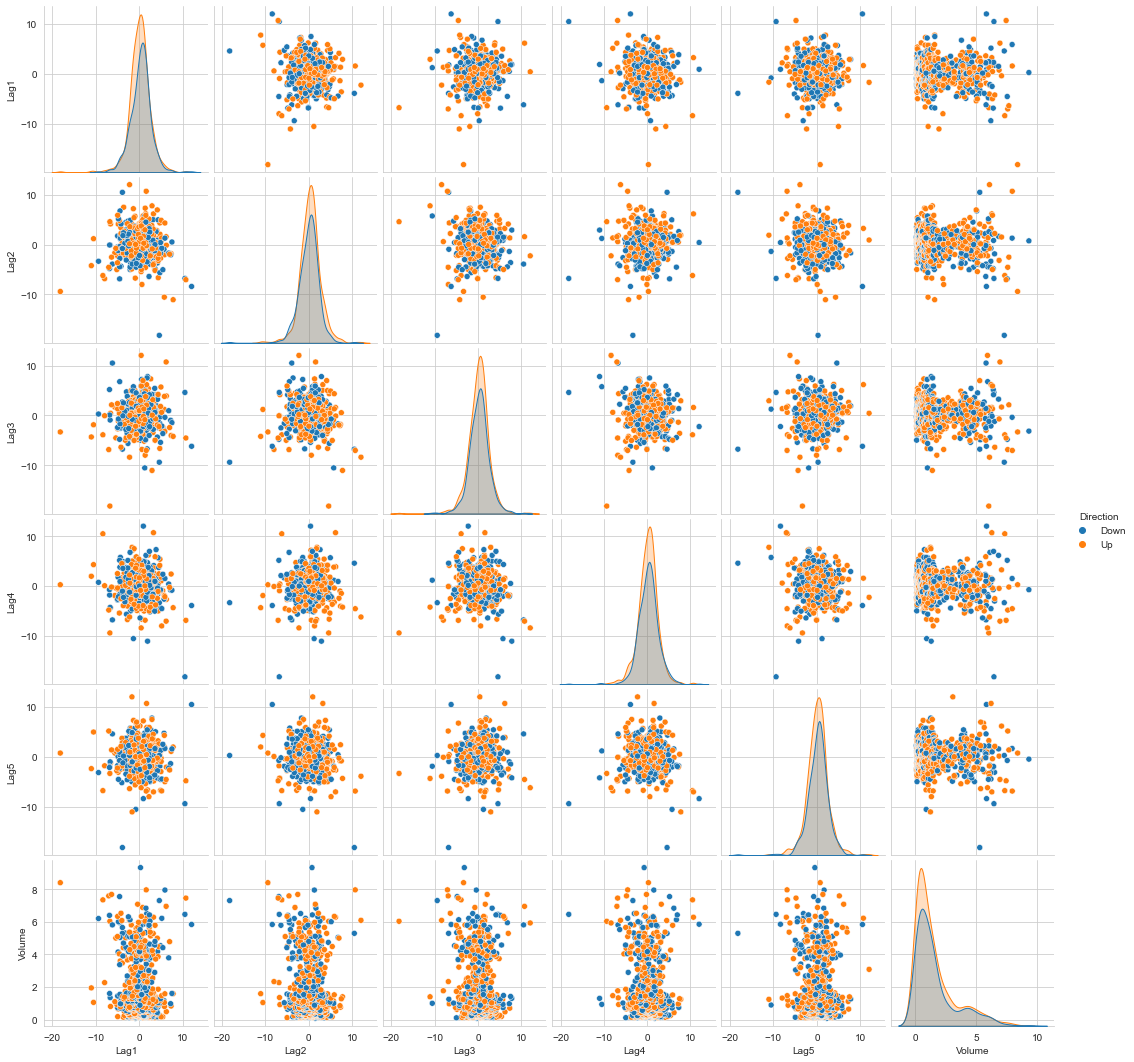

In [10]:
sns.set_style('whitegrid')
sns.pairplot(data= weekly_df, hue='Direction', vars=['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'])
sns.set(font_scale=1.1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split( weekly_df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']], weekly_df['Direction'],random_state=11,test_size=0.20)
logReg = LogisticRegression(max_iter=100000)
logReg.fit(X=X_train, y=y_train)

pred = logReg.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")

Accuracy: 56.42%


<AxesSubplot:>

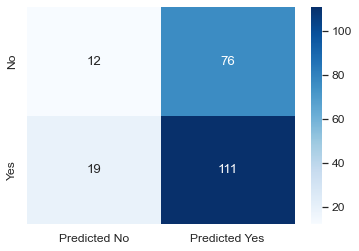

In [12]:
# confision matrix
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

Accuracy: 59.55%


<AxesSubplot:>

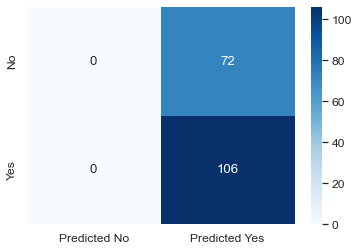

In [13]:
weekly_df = weekly_df[weekly_df['Year'] < 2008]
weekly_df = weekly_df[weekly_df['Year'] > 1990]
X_train, X_test, y_train, y_test = train_test_split( weekly_df[['Lag2']], weekly_df['Direction'],random_state=11,test_size=0.20)
logReg = LogisticRegression(max_iter=100000)
logReg.fit(X=X_train, y=y_train)

pred = logReg.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")
conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

#### ISLR chapter 4 Q14


In [14]:
Auto_df = pd.read_csv('Auto.csv')
Auto_df.info()
Auto_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [15]:

Auto_df['mpg01'] = Auto_df['mpg'] > Auto_df['mpg'].median() #make a binary target
Auto_df['mpg01'] = Auto_df['mpg01'].astype(int)
Auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


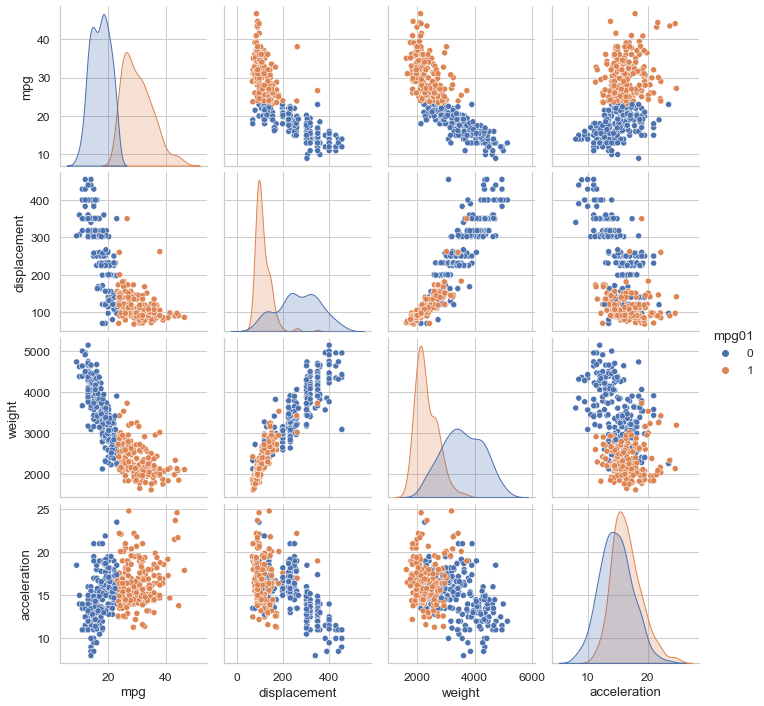

In [16]:
sns.set_style('whitegrid')
sns.pairplot(data= Auto_df, hue='mpg01', vars=['mpg', 'displacement', 'weight', 'acceleration'])
sns.set(font_scale=1.1)

Mean accuracy: 98.74%
Accuracy standard deviation: 1.54%
Accuracy: 98.75%
MSE: 1.25%


<AxesSubplot:>

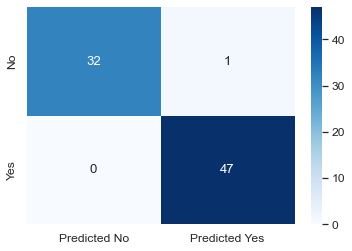

In [17]:
X_train, X_test, y_train, y_test = train_test_split( Auto_df[['mpg', 'displacement', 'weight', 'acceleration']], Auto_df['mpg01'],random_state=11,test_size=0.20)
kfold = KFold(n_splits=10, random_state=11, shuffle=True)


logReg = LogisticRegression(max_iter=100000)

scores = cross_val_score(estimator=logReg, X=X_train, y=y_train, cv=kfold)

print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')


logReg.fit(X=X_train, y=y_train)

pred = logReg.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")
print(f"MSE: {metrics.mean_squared_error(y_test, pred):.2%}")

conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

#### ISLR chapter 4 Q16


In [18]:
#import Weekly dataset

Boston_df = pd.read_csv('Boston.csv')
Boston_df.info()
Boston_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [19]:
Boston_df.head()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [20]:
Boston_df['target'] = Boston_df['crim'] > Boston_df['crim'].median() #make a binary target
Boston_df['target'] = Boston_df['target'].astype(int)
Boston_df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,target
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,0
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,0
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,0


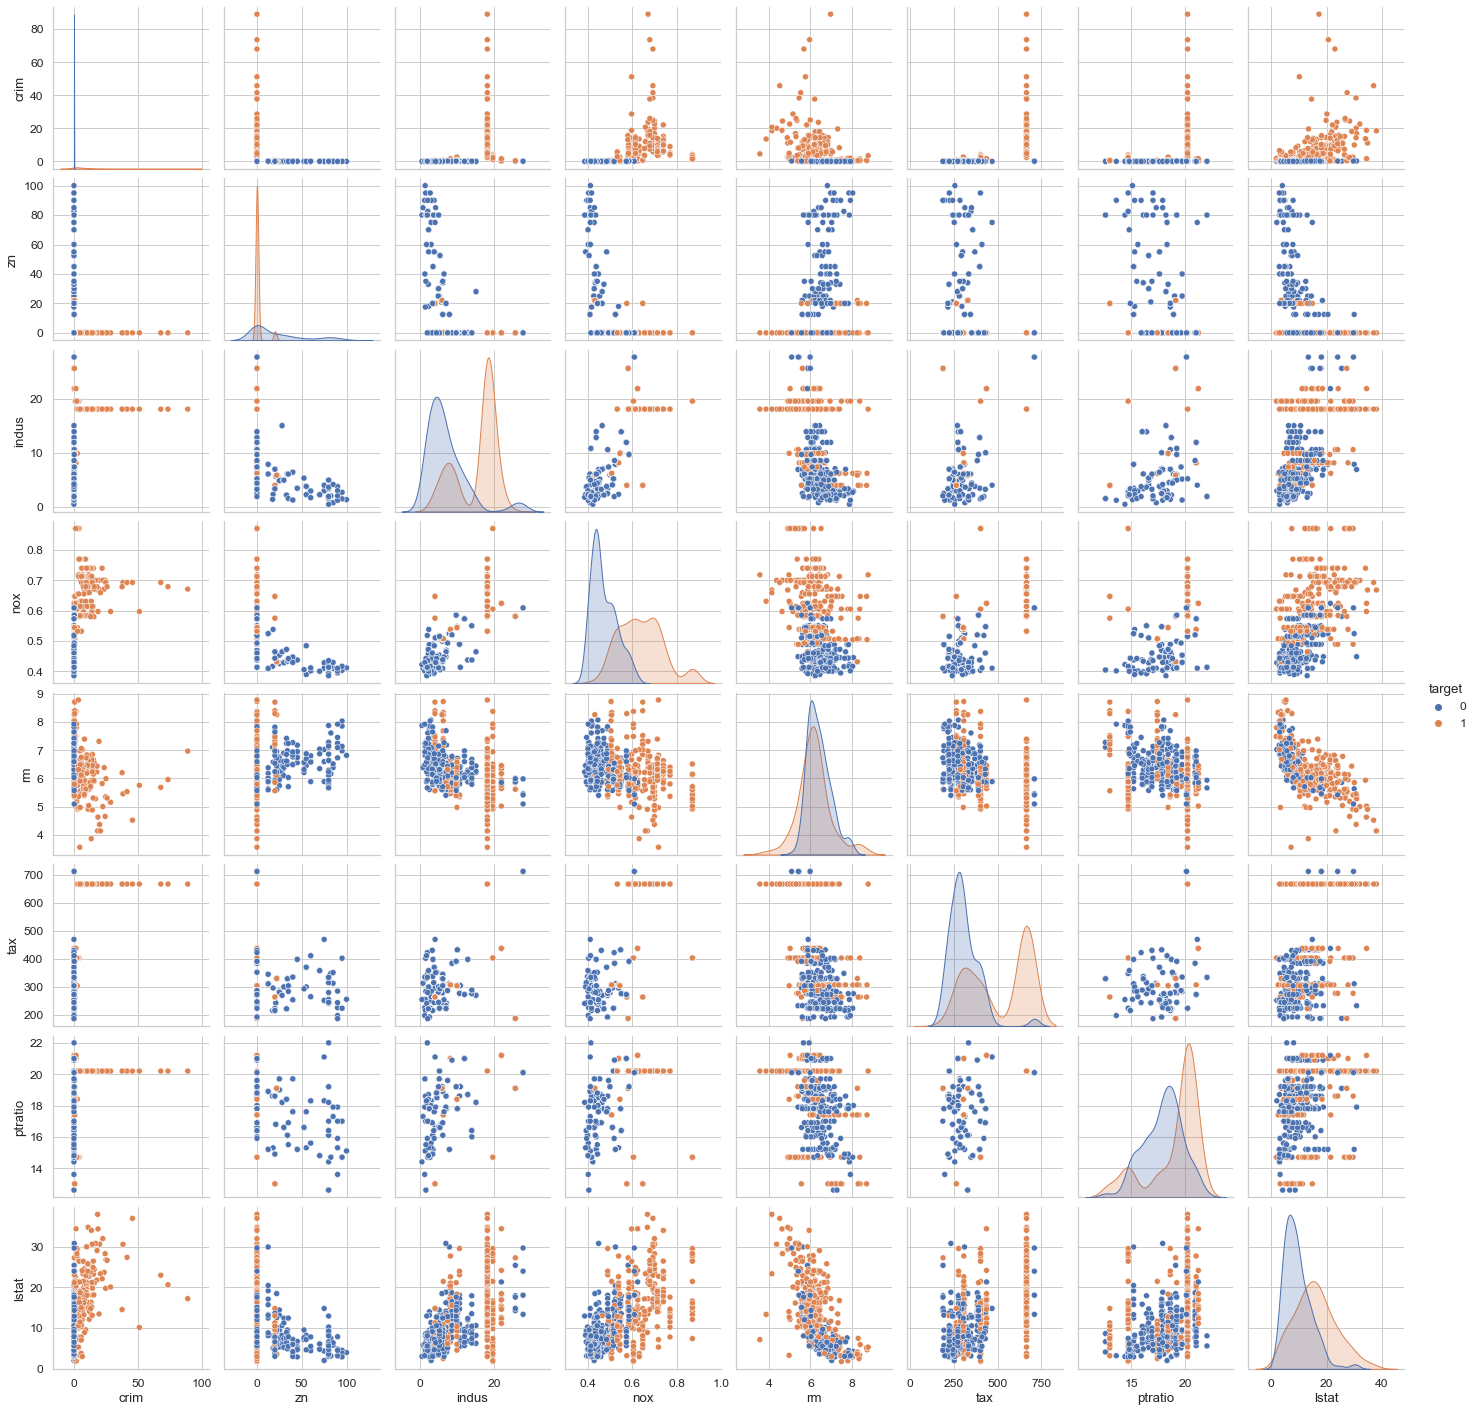

In [21]:
sns.set_style('whitegrid')
sns.pairplot(data= Boston_df, hue='target', vars=["crim", "zn", "indus", "nox", "rm", "tax", "ptratio", "lstat"])
sns.set(font_scale=1.1)

Mean accuracy: 95.04%
Accuracy standard deviation: 2.49%
Accuracy: 94.12%
MSE: 5.88%


<AxesSubplot:>

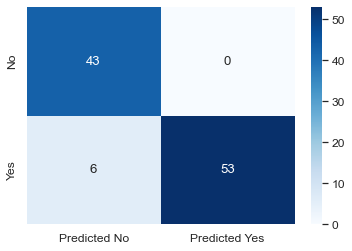

In [22]:
X_train, X_test, y_train, y_test = train_test_split( Boston_df[["crim", "zn", "indus", "nox", "rm", "tax", "ptratio", "lstat"]], Boston_df['target'],random_state=11,test_size=0.20)
kfold = KFold(n_splits=10, random_state=11, shuffle=True)


logReg = LogisticRegression(max_iter=100000)

scores = cross_val_score(estimator=logReg, X=X_train, y=y_train, cv=kfold)

print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')


logReg.fit(X=X_train, y=y_train)

pred = logReg.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")
print(f"MSE: {metrics.mean_squared_error(y_test, pred):.2%}")

conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')





### Lesson 15

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### ISLR chapter 4 Q13

In [24]:
weeklyLDA = LinearDiscriminantAnalysis()


weekly_df = pd.read_csv('Weekly.csv')

In [25]:
X_train, X_test, y_train, y_test = train_test_split( weekly_df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']], weekly_df['Direction'],random_state=11,test_size=0.20)
weeklyLDA.fit(X=X_train, y=y_train)
pred = weeklyLDA.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")

Accuracy: 56.88%


<AxesSubplot:>

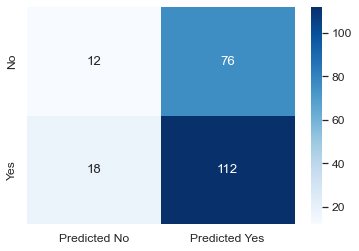

In [26]:

conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

Accuracy: 59.55%


<AxesSubplot:>

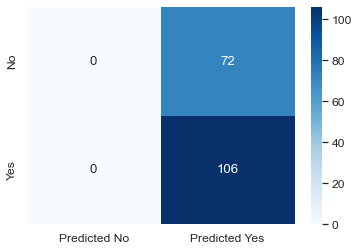

In [27]:
weekly_df = weekly_df[weekly_df['Year'] < 2008]
weekly_df = weekly_df[weekly_df['Year'] > 1990]
X_train, X_test, y_train, y_test = train_test_split( weekly_df[['Lag2']], weekly_df['Direction'],random_state=11,test_size=0.20)
weeklyLDA.fit(X=X_train, y=y_train)
pred = weeklyLDA.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")

conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

#### ISLR chapter 4 Q14

Mean accuracy: 96.85%
Accuracy standard deviation: 3.72%
Accuracy: 91.25%
MSE: 8.75%


<AxesSubplot:>

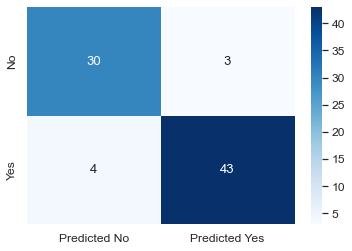

In [28]:
autoLDA = LinearDiscriminantAnalysis()
X_train, X_test, y_train, y_test = train_test_split( Auto_df[['mpg', 'displacement', 'weight', 'acceleration']], Auto_df['mpg01'],random_state=11,test_size=0.20)
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

scores = cross_val_score(estimator=autoLDA, X=X_train, y=y_train, cv=kfold)

print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')

autoLDA.fit(X=X_train, y=y_train)

pred = autoLDA.predict(X_test)
print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")
print(f"MSE: {metrics.mean_squared_error(y_test, pred):.2%}")

conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

#### ISLR chapter 4 Q16



Mean accuracy: 86.11%
Accuracy standard deviation: 5.17%
Accuracy: 79.41%
MSE: 20.59%


<AxesSubplot:>

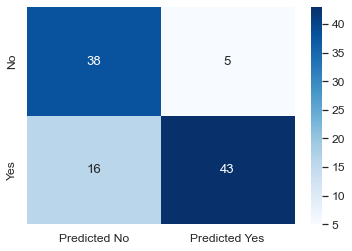

In [29]:
Boston_lda = LinearDiscriminantAnalysis()
X_train, X_test, y_train, y_test = train_test_split( Boston_df[["crim", "zn", "indus", "nox", "rm", "tax", "ptratio", "lstat"]], Boston_df['target'],random_state=11,test_size=0.20)
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

scores = cross_val_score(estimator=Boston_lda, X=X_train, y=y_train, cv=kfold)

print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')


Boston_lda.fit(X=X_train, y=y_train)

pred = Boston_lda.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")
print(f"MSE: {metrics.mean_squared_error(y_test, pred):.2%}")

conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')


### Lesson 16

In [30]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#### ISLR chapter 4 Q13


Accuracy: 59.63%


<AxesSubplot:>

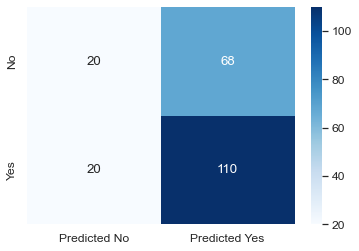

In [31]:
weekly_df = pd.read_csv('Weekly.csv')

weeklyQDA = QuadraticDiscriminantAnalysis()

X_train, X_test, y_train, y_test = train_test_split( weekly_df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']], weekly_df['Direction'],random_state=11,test_size=0.20)

weeklyQDA.fit(X=X_train, y=y_train)

pred = weeklyQDA.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")

conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')



Accuracy: 59.55%


<AxesSubplot:>

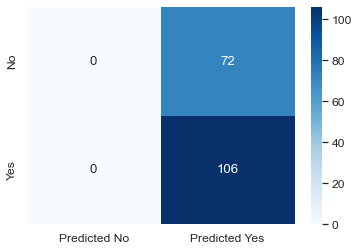

In [32]:
weekly_df = weekly_df[weekly_df['Year'] < 2008]
weekly_df = weekly_df[weekly_df['Year'] > 1990]
X_train, X_test, y_train, y_test = train_test_split( weekly_df[['Lag2']], weekly_df['Direction'],random_state=11,test_size=0.20)

weeklyQDA.fit(X=X_train, y=y_train)

pred = weeklyQDA.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")

conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')


#### ISLR chapter 4 Q14



Mean accuracy: 94.33%
Accuracy standard deviation: 4.38%
Accuracy: 97.50%
MSE: 2.50%


<AxesSubplot:>

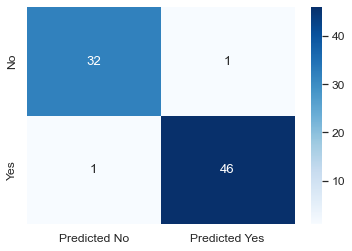

In [33]:
X_train, X_test, y_train, y_test = train_test_split( Auto_df[['mpg', 'displacement', 'weight', 'acceleration']], Auto_df['mpg01'],random_state=11,test_size=0.20)
kfold = KFold(n_splits=10, random_state=11, shuffle=True)


autoQDA = QuadraticDiscriminantAnalysis()

scores = cross_val_score(estimator=autoQDA, X=X_train, y=y_train, cv=kfold)

print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')


autoQDA.fit(X=X_train, y=y_train)

pred = autoQDA.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")
print(f"MSE: {metrics.mean_squared_error(y_test, pred):.2%}")

conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

#### ISLR chapter 4 Q16



Mean accuracy: 95.04%
Accuracy standard deviation: 2.49%
Accuracy: 96.08%
MSE: 3.92%


<AxesSubplot:>

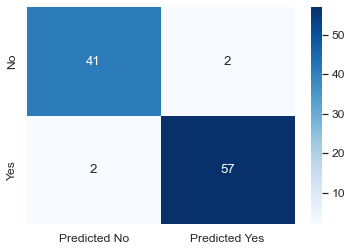

In [34]:
X_train, X_test, y_train, y_test = train_test_split( Boston_df[["crim", "zn", "indus", "nox", "rm", "tax", "ptratio", "lstat"]], Boston_df['target'],random_state=11,test_size=0.20)
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

bostonQDA = QuadraticDiscriminantAnalysis()

scores = cross_val_score(estimator=logReg, X=X_train, y=y_train, cv=kfold)

print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')


bostonQDA.fit(X=X_train, y=y_train)

pred = bostonQDA.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")
print(f"MSE: {metrics.mean_squared_error(y_test, pred):.2%}")

conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

### Lesson 17

#### ISLR chapter 4 Q13


In [35]:
from sklearn.naive_bayes import GaussianNB

Accuracy: 56.88%


<AxesSubplot:>

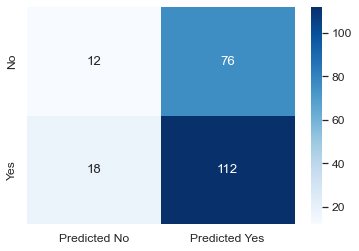

In [36]:
weekly_df = pd.read_csv('Weekly.csv')

X_train, X_test, y_train, y_test = train_test_split( weekly_df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']], weekly_df['Direction'],random_state=11,test_size=0.20)

weeklyNB = GaussianNB()

weeklyLDA.fit(X=X_train, y=y_train)

pred = weeklyLDA.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")
conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

Accuracy: 59.55%


<AxesSubplot:>

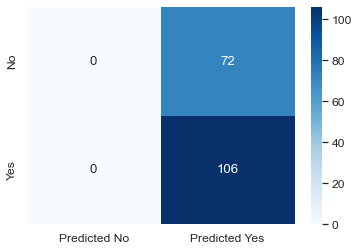

In [37]:
weekly_df = weekly_df[weekly_df['Year'] < 2008]
weekly_df = weekly_df[weekly_df['Year'] > 1990]
X_train, X_test, y_train, y_test = train_test_split( weekly_df[['Lag2']], weekly_df['Direction'],random_state=11,test_size=0.20)

weeklyNB = GaussianNB()

weeklyLDA.fit(X=X_train, y=y_train)

pred = weeklyLDA.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")
conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

#### ISLR chapter 4 Q14


Mean accuracy: 91.52%
Accuracy standard deviation: 4.82%
Accuracy: 92.50%
MSE: 7.50%


<AxesSubplot:>

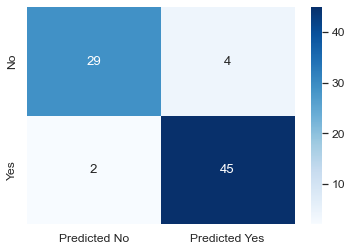

In [38]:
AutoNB = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split( Auto_df[['mpg', 'displacement', 'weight', 'acceleration']], Auto_df['mpg01'],random_state=11,test_size=0.20)
kfold = KFold(n_splits=10, random_state=11, shuffle=True)


scores = cross_val_score(estimator=AutoNB, X=X_train, y=y_train, cv=kfold)

print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')


AutoNB.fit(X=X_train, y=y_train)

pred = AutoNB.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")
print(f"MSE: {metrics.mean_squared_error(y_test, pred):.2%}")

conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

#### ISLR chapter 4 Q16


Mean accuracy: 94.04%
Accuracy standard deviation: 3.55%
Accuracy: 94.12%
MSE: 5.88%


<AxesSubplot:>

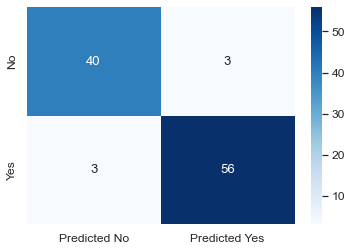

In [39]:
bostonNB = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split( Boston_df[["crim", "zn", "indus", "nox", "rm", "tax", "ptratio", "lstat"]], Boston_df['target'],random_state=11,test_size=0.20)
kfold = KFold(n_splits=10, random_state=11, shuffle=True)



scores = cross_val_score(estimator=bostonNB, X=X_train, y=y_train, cv=kfold)

print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')


bostonNB.fit(X=X_train, y=y_train)

pred = bostonNB.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")
print(f"MSE: {metrics.mean_squared_error(y_test, pred):.2%}")

conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')


### Lesson 18

#### ISLR chapter 9 Q1


        This problem involves hyperplanes in two dimensions.
        (a) Sketch the hyperplane 1 + 3X1 − X2 = 0. Indicate the set of
        points for which 1 + 3X1 − X2 > 0, as well as the set of points
        for which 1 + 3X1 − X2 < 0.
        (b) On the same plot, sketch the hyperplane −2 + X1 + 2X2 = 0.
        Indicate the set of points for which −2 + X1 + 2X2 > 0, as well
        as the set of points for which −2 + X1 + 2X2 < 0

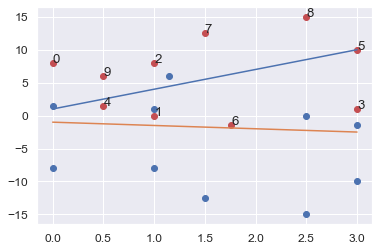

In [78]:


b = 1
w = [3, -1]
X = np.linspace(0, 3, 10)

b2 = 2
w2 = [1, 2]

def getx2values(x1values, w, b): # code from lesson 18
    ''' returns vector of (x2values) corresponding to (x1values) domain and 
    the (w) vector (as an np.array of length 2 corresponding to x1 and x2 entries) 
    and (b) bias term
    '''
    x2values = (-w[0]*x1values - b)/w[1]

    return x2values

data = np.array([[0, 8], [1, 0], [1, 8], [3, 1], [0.5, 1.5], [3, 10], [1.76, -1.5], [1.5, 12.5], [2.5, 15], [0.5, 6]])
data2 = np.array([[0, -8], [2.5, 0], [1, -8], [1, 1], [0, 1.5], [3, -10], [3, -1.5], [1.5, -12.5], [2.5, -15], [1.15, 6]])
plt.plot(X, getx2values(X, w, b))
plt.plot(X, getx2values(X, w2, b2))
plt.scatter(data[:, 0], data[:, 1], c='b')
plt.scatter(data2[:, 0], data2[:, 1], c='r')
for i in range(len(data)):
    plt.text(data[i, 0], data[i, 1] + 0.05, str(i)) 
plt.show()






#### ISLR chapter 9 Q3


Decision Boundary (y =-0.6153846153846154x1  + 1.076923076923077x2  -0.8461538461538456)
lower margin (-1 =-0.6153846153846154x1  + 1.076923076923077x2  -0.8461538461538456)
upper margin(1 =-0.6153846153846154x1  + 1.076923076923077x2  -0.8461538461538456)


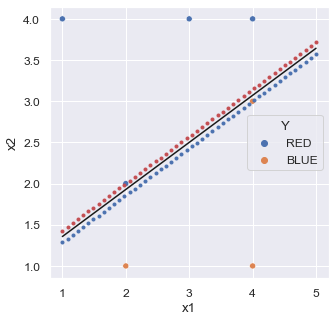

In [127]:
data = { "x1": [3,2,4,1,2,4,4], "x2": [4,2,4,4,1,3,1],"Y":["RED","RED","RED","RED","BLUE","BLUE","BLUE"]}

dat_df = pd.DataFrame(data)
## dat_df["Y"] = dat_df["Y"] == "RED"

# dat_df["Y"] = dat_df["Y"].astype(int)
plt.figure(1,figsize= (5, 5))


sns.scatterplot(x="x1", y="x2", hue="Y", data=dat_df)

# find the optimal seperating hyperplane

clf = SVC(kernel="linear",gamma='auto')

clf.fit(dat_df[["x1", "x2"]], dat_df["Y"])

w = clf.coef_[0]
a = -w[0] / w[1]

b = clf.support_vectors_[1]

xx = np.linspace(1, 5)


yy = a * xx - (clf.intercept_[0]) / w[1]
y_neg = a * xx + (b[1] - a * b[0]) 
b2 = clf.support_vectors_[-2]
y_pos = a * xx + (b2[1] - a * b2[0])

plt.plot(xx, yy, 'k'   )
plt.plot(xx, y_neg, 'b.' )
plt.plot(xx, y_pos, 'r.' )


print(f"Decision Boundary (y ={w[0]}x1  + {w[1]}x2  {clf.intercept_[0] })")
print(f"lower margin (-1 ={w[0]}x1  + {w[1]}x2  {clf.intercept_[0] })")
print(f"upper margin(1 ={w[0]}x1  + {w[1]}x2  {clf.intercept_[0] })")

clf.support_vectors_, clf.coef_[0], clf.intercept_

### Lesson 20

#### ISLR chapter 4 Q13

In [41]:
from sklearn.neighbors import KNeighborsClassifier

weeklyKNN = KNeighborsClassifier(n_neighbors=5)
weekly_df = pd.read_csv('Weekly.csv')
X_train, X_test, y_train, y_test = train_test_split( weekly_df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']], weekly_df['Direction'],random_state=11,test_size=0.20)


Accuracy: 55.50%


<AxesSubplot:>

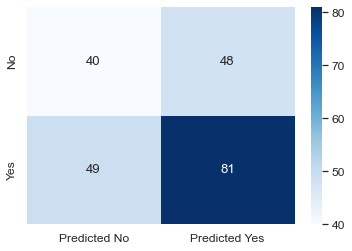

In [42]:
weeklyKNN.fit(X=X_train, y=y_train)

pred = weeklyKNN.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")
conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

Accuracy: 50.56%


<AxesSubplot:>

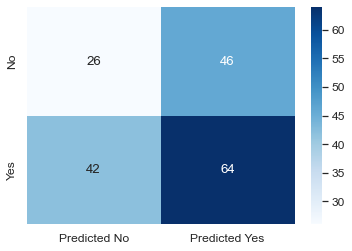

In [43]:
weekly_df = weekly_df[weekly_df['Year'] < 2008]
weekly_df = weekly_df[weekly_df['Year'] > 1990]
X_train, X_test, y_train, y_test = train_test_split( weekly_df[['Lag2']], weekly_df['Direction'],random_state=11,test_size=0.20)
weeklyKNN.fit(X=X_train, y=y_train)
pred = weeklyKNN.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")

conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

#### ISLR chapter 4 Q14


Mean accuracy: 84.89%
Accuracy standard deviation: 6.47%
Accuracy: 91.25%
MSE: 8.75%


<AxesSubplot:>

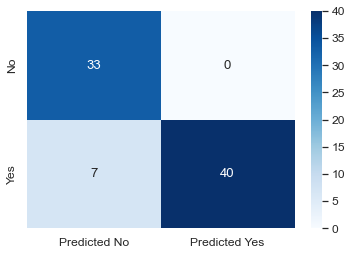

In [44]:
autoKnn = KNeighborsClassifier(n_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split( Auto_df[['mpg', 'displacement', 'weight', 'acceleration']], Auto_df['mpg01'],random_state=11,test_size=0.20)
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

scores = cross_val_score(estimator=autoKnn, X=X_train, y=y_train, cv=kfold)

print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')

autoKnn.fit(X=X_train, y=y_train)

pred = autoKnn.predict(X_test)
print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")
print(f"MSE: {metrics.mean_squared_error(y_test, pred):.2%}")

conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

#### ISLR chapter 4 Q16


Mean accuracy: 93.09%
Accuracy standard deviation: 4.35%
Accuracy: 97.06%
MSE: 2.94%


<AxesSubplot:>

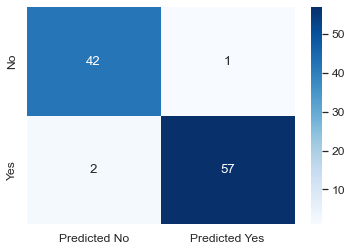

In [45]:
bostonKNN = KNeighborsClassifier(n_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split( Boston_df[["crim", "zn", "indus", "nox", "rm", "tax", "ptratio", "lstat"]], Boston_df['target'],random_state=11,test_size=0.20)
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

scores = cross_val_score(estimator=bostonKNN, X=X_train, y=y_train, cv=kfold)

print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')

bostonKNN.fit(X=X_train, y=y_train)

pred = bostonKNN.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")
print(f"MSE: {metrics.mean_squared_error(y_test, pred):.2%}")

conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')


### Lesson 19

In [46]:
from sklearn.svm import SVC

#### ISLR chapter 4 Q13

Accuracy: 58.43%


<AxesSubplot:>

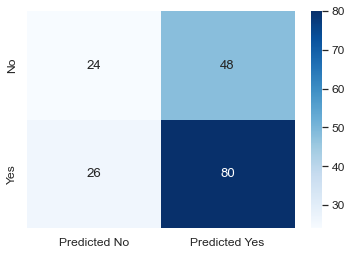

In [47]:
weeklysvm = SVC(kernel='rbf', C=1, gamma='auto')
X_train, X_test, y_train, y_test = train_test_split( weekly_df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']], weekly_df['Direction'],random_state=11,test_size=0.20)

pred = weeklysvm.fit(X=X_train, y=y_train).predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")

conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

Accuracy: 61.24%


<AxesSubplot:>

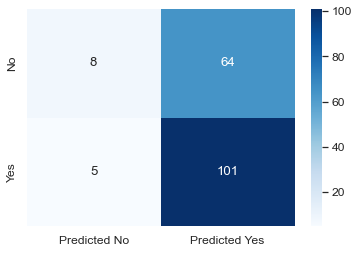

In [48]:
weekly_df = weekly_df[weekly_df['Year'] < 2008]
weekly_df = weekly_df[weekly_df['Year'] > 1990]
X_train, X_test, y_train, y_test = train_test_split( weekly_df[['Lag2']], weekly_df['Direction'],random_state=11,test_size=0.20)
weeklysvm.fit(X=X_train, y=y_train)
pred = weeklysvm.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")

conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

#### ISLR chapter 4 Q14

Mean accuracy: 98.74%
Accuracy standard deviation: 2.08%
Accuracy: 98.75%
MSE: 1.25%


<AxesSubplot:>

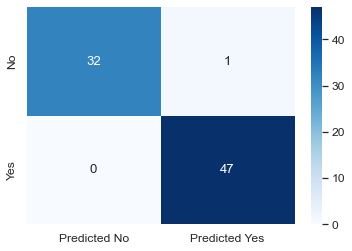

In [49]:
autosvm = SVC(kernel="linear", C=0.1)
X_train, X_test, y_train, y_test = train_test_split( Auto_df[['mpg', 'displacement', 'weight', 'acceleration']], Auto_df['mpg01'],random_state=11,test_size=0.20)
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

scores = cross_val_score(estimator=autosvm, X=X_train, y=y_train, cv=kfold)

print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')

autosvm.fit(X=X_train, y=y_train)

pred = autosvm.predict(X_test)
print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")
print(f"MSE: {metrics.mean_squared_error(y_test, pred):.2%}")

conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

#### ISLR chapter 4 Q16

Mean accuracy: 97.02%
Accuracy standard deviation: 1.86%
Accuracy: 95.10%
MSE: 4.90%


<AxesSubplot:>

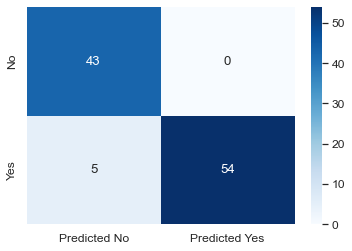

In [50]:
bostonsvm = SVC(kernel="linear", C=2)
X_train, X_test, y_train, y_test = train_test_split( Boston_df[["crim", "zn", "indus", "nox", "rm", "tax", "ptratio", "lstat"]], Boston_df['target'],random_state=11,test_size=0.20)
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

scores = cross_val_score(estimator=bostonsvm, X=X_train, y=y_train, cv=kfold)

print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')


bostonsvm.fit(X=X_train, y=y_train)

pred = bostonsvm.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, pred):.2%}")
print(f"MSE: {metrics.mean_squared_error(y_test, pred):.2%}")

conf = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf, index=['No', 'Yes'], columns=['Predicted No', 'Predicted Yes'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')


### Lesson 21

#### ISLR chapter 9 Q7


#### ISLR chapter 9 Q8


In [82]:
import random

carav = pd.read_csv('Caravan.csv')

X_